# Maya

## Research question/interests

My research questions focus on CO2 emissions and GDP. I have two main questions which are:

1. Over the years, how does the correlation between GDP and CO2 emissions compare for the  15 richest Countries vs the 15 poorest countries? Do these correlations hold during financial crises periods?

2. How does the percantage of CO2 emissions for the top 15 richest Countries (based on GDP - per capita adjusted for purchasing power) compare to the 15 poorest countries? How has this changed over the years?


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


dataEmissions = pd.read_csv('../data/raw/CO2emissions.csv', skiprows=4) 
dataEmissions = dataEmissions.drop(dataEmissions.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]], axis=1)
dataEmissions = dataEmissions.drop(dataEmissions.columns[[31, 32,33]], axis=1)
 

#clean data, remove rows that are not specific countries
dataEmissions.drop(dataEmissions.index[[1,3,36, 49, 61, 62,63, 64, 65, 73, 
                             74, 98, 102, 103, 104, 105, 107, 110, 
                             128, 134, 135, 139, 140, 142, 153, 156, 170,
                             181, 183, 191, 198, 215, 218, 230, 231, 236, 
                             238, 240, 241, 249, 259,]], inplace=True)



In [ ]:
dataGDP = pd.read_csv('../data/raw/gdp-per-capita-worldbank.csv')


## Milestone 3 


### Prepare Data For EDA 

In [ ]:


#Wrangle Data: Restructure data format of Emissions Data
dataEmissions = dataEmissions.melt(id_vars = ["Country Name"])
dataEmissions2 = dataEmissions.copy(deep = False )

#Process Data: Rename rows in restruced Emissions data 
dataEmissions2.rename(columns={dataEmissions2.columns[1]: 'Year', dataEmissions2.columns[2]: 'CO2 emissions'},inplace=True)

#Clean Data: Drop rows that don't have CO2 emissions data 
dataEmissions2=dataEmissions2.dropna(subset=['CO2 emissions'])
dataEmissions2.to_csv(r'../data/processed/modifiedEmissions.csv', index=False)



#Process Data: Rename GDP column to make it mergable with CO2 emissions Data 
dataGDP.rename(columns={dataGDP.columns[0]: 'Country Name'}, inplace=True)
dataGDP.to_csv(r'../data/processed/modifiedGDP.csv', index=False)

#Process Data: Make sure GDP and data Emissions columns are of the same type int, else they aren't mergable
dataGDP['Year'] = dataGDP['Year'].astype(int)
dataEmissions2['Year'] = dataEmissions2['Year'].astype(int)

#Merge CO2 emissions data and GDP, keeping extra columns from GDP
mergeCO2AndGDP = pd.merge(dataGDP, dataEmissions2, on=['Country Name', 'Year'], how = 'left')

#Clean Data: Drop missing values and save data 
mergeCO2AndGDP = mergeCO2AndGDP.dropna(subset=['CO2 emissions'])
mergeCO2AndGDP.to_csv(r'../data/processed/CO2AndGDP.csv', index=False)



/var/folders/ff/_xd3fd69573csz7xwvwjwcs80000gn/T/ipykernel_8511/2898658915.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  dataEmissions = dataEmissions.melt(id_vars = ["Country Name"])


ValueError: invalid literal for int() with base 10: 'variable'

## Task 1 - Exploratory Data Analysis

First I will analyze each dataset I'm investigating, individually

In [ ]:
print(f"Rows, Columns:  {dataEmissions2.shape}")
print()
print("Column Name    Column Type")
print(dataEmissions2.dtypes)
dataEmissions2.describe()

Rows, Columns:  (5944, 3)

Column Name    Column Type
Country Name      object
Year               int64
CO2 emissions    float64
dtype: object


,Year,CO2 emissions
count,5944.000000,5944.000000
mean,2004.547275,4.290987
std,8.642241,5.453740
min,1990.000000,0.000000
25%,1997.000000,0.589271
50%,2005.000000,2.376607
75%,2012.000000,6.305612
max,2019.000000,50.954034


In [ ]:

print(f"Rows, Columns:  {dataGDP.shape}")
print()
print("Column Name    Column Type")
print(dataGDP.dtypes)
dataGDP.describe()

Rows, Columns:  (6166, 4)

Column Name    Column Type
Country Name                                            object
Code                                                    object
Year                                                     int64
GDP per capita, PPP (constant 2017 international $)    float64
dtype: object


,Year,"GDP per capita, PPP (constant 2017 international $)"
count,6166.000000,6166.000000
mean,2005.432533,17879.286262
std,8.841631,20132.683171
min,1990.000000,436.720367
25%,1998.000000,3678.829102
50%,2006.000000,10365.778320
75%,2013.000000,25832.031738
max,2020.000000,161971.468750


From this analysis, I can see that both data sets have a similar amount of rows and columns. This is good for my analysis since I will go on to merge these datasets. I can see from the summary statistics that the years vary slightly, so we will loose some of this data when the merge is performed. 

## Visualizations

/opt/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


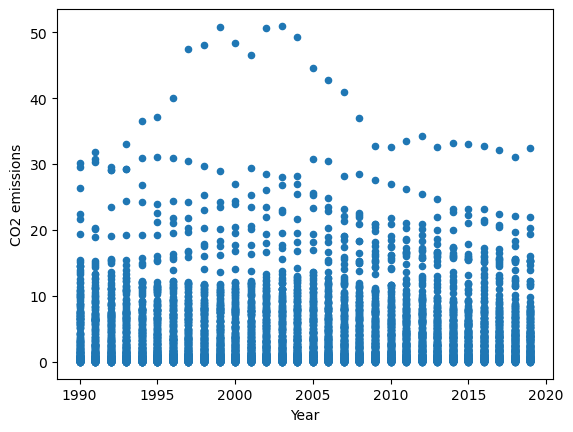

In [ ]:
#Visualization for CO2 emissions
plotEmissions = dataEmissions2.plot(kind='scatter', x='Year', y='CO2 emissions')


From this graph I can see that from roughly 1998 to 2007, CO2 emissions were incredibly high. This makes me curious as to what happened during these years to cause this, and which countries were responsible for it. I can also see that emissions of 15 metric tons (of CO2 emissions) per capita or below is very common, even still today just as much as ot was in 1990 (roughly). Overall, I can see that plotting every single data point available creates an overwhelming graph. For my later visualizations I will limit the amount of data points. 

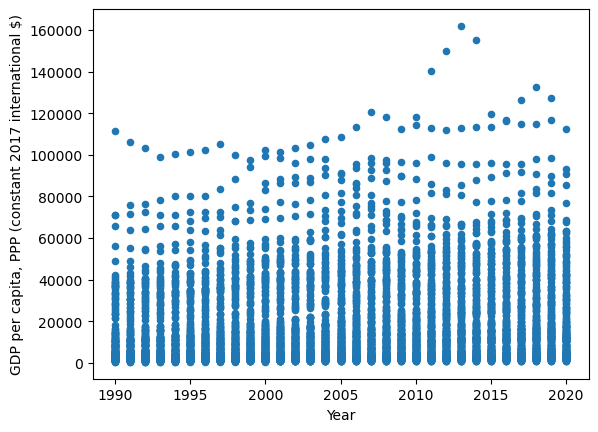

In [ ]:
#Visualization for GDP emissions
GDPEmissions = dataGDP.plot(kind='scatter', x='Year', y='GDP per capita, PPP (constant 2017 international $)')


This graph is less surprising to me. It is no surprise that GDP is slowly growing little by little. Again, I'm curious which countries lay near the top. Similar to the CO2 emissions graph I think it's best to limit the amount of data that I visualize. However just from looking at the two graphs, they have a very similar shape. Most of the data is concentrated near the bottom quarter for both graphs with a small percentage of data points scattering the top 3 quarters roughly. What I would like to see is if it's the same countries making up the top points/bottom points in both graphs. 

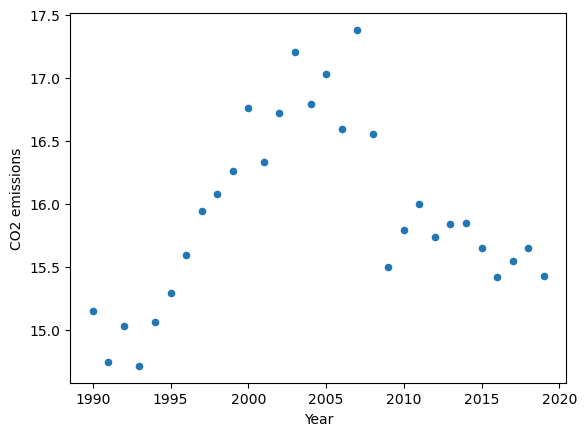

In [ ]:
#Visualization for CO2 emissions for Canada
emissionsCanada = dataEmissions2[dataEmissions2["Country Name"] == "Canada"]

plotCanadaEmissions = emissionsCanada.plot(kind='scatter', x='Year', y='CO2 emissions')



In an effort to limit the data that I'm plotting, I decided to focus on just Canada's CO2 emissions over the years by creating a new dataframe where I just grab the values corresponding to Canada. What I find interesting from this scatterplot is that it kind of has an upside down U shape. There was steady growth from 1990 til 2005. Then from 2005 to 2020 the values sort of zigzag in a downwards direction. This seems reflective of the country's efforts to reduce CO2 emissions in recent times

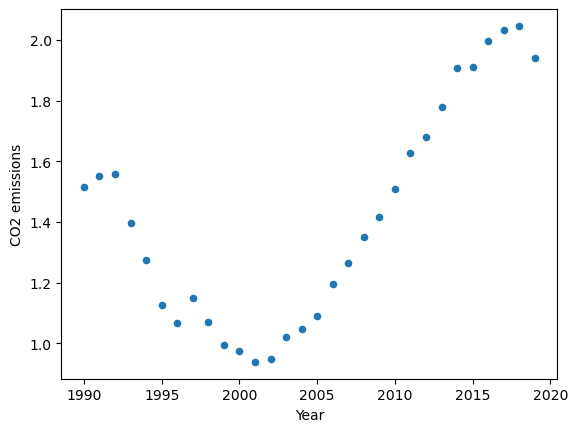

In [ ]:
#Visualization for CO2 emissions for Bolivia 
emissionsCanada = dataEmissions2[dataEmissions2["Country Name"] == "Bolivia"]
plotCanadaEmissions = emissionsCanada.plot(kind='scatter', x='Year', y='CO2 emissions')


I decided to compare Canada's CO2 emissions with a developing nation's CO2 emissions. I chose Bolivia because I am of a Bolivian background and it interested me to see Bolivia's CO2 emissions. I did not expect to see a graph that seems almost the complete opposite of Canada's. Bolivia's CO2 emissions interestingly, decreased from 1990 to 2000 and from then on steadily increased til about 2019. It's not clear if the decrease in emissions in 2020 is due to covid or is the result of an intentional effort to decrease emissions. 

In my later visualizations I'm looking forward to analyzing more developing countries CO2 emissons in comparison to developing countries, and seeing how/if GDP relates. 

It  should also be noted that the metric tons (of CO2 emissions) per capita for Bolivia range from 0.5 to 2.5 where, Canada ranges from 14 to 18. This is a giant discrepancy. In my later visualizations I will have to adjust the y axis to make an improved comparison. 

### Task 2 - Data Analysis Pipeline


1. Load Data (Done in cell 1 and 2)
2. Clean Data (Done in cell 1 and 3) 
3. Process Data (Done in cell 3)
4. Wrangle Data (Done in cell 3)  

### Task 3 - Method Chaining and Writing Python Programs 

### Task 4 - Answering My Research Questions 

In [ ]:
#Establish countries with highest and lowest GDPs to help answer my research questions

#SOURCE: https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD

#The 15 Countries with highest GDP - PPP (per capita adjusted for purchasing power)in 2021 according to World Bank
listTop15 = ["Luxembourg", "Singapore", "Ireland", "Qatar", "Bermuda", 
                          "Norway", "Switzerland", "United States", "United Arab Emirates",
                          "Brunei", "Hong Kong", "Denmark", "Netherlands"]

#The 15 Countries with lowest GDP - PPP (per capita adjusted for purchasing power)in 2019
listBottom15 = ["Burundi", "Central Africa Republic", "Congo, Rep.", "Somalia", "Niger", 
                "Mozambique", "Liberia", "Chad", "Eritrea", "Madagascar", 
                "Malawi", "Sierra Leone","Guinea-Bissau", "Afghanistan", "Kiribati"]
        

def isTop15(row):
    if row['Country Name'] in listTop15:
        return "Top 15"
    if row['Country Name'] in listBottom15:
        return "Bottom 15"
    else:
        return None 
    
    
gdpCO2AnalysisTop15 = mergeCO2AndGDP['GDP - PPP Ranking'] = mergeCO2AndGDP.apply(isTop15, axis=1)


gdpCO2Analysis = pd.concat([mergeCO2AndGDP, gdpCO2Analysis], ignore_index=True, sort=False)
gdpCO2Analysis.to_csv(r'../data/processed/CO2AndGDPAnalysis.csv', index=False)




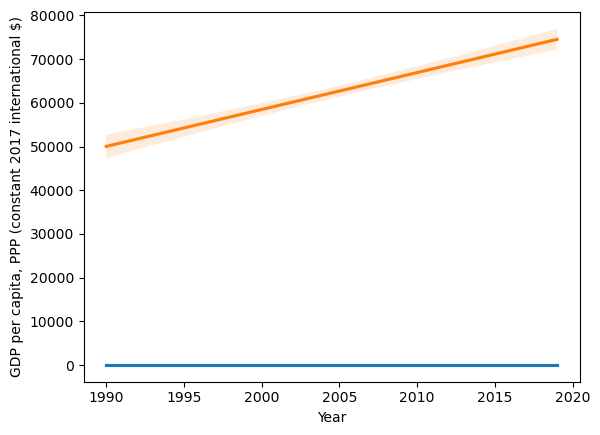

In [ ]:
#Research Question 1

#Analysis for top 15 richest countries
gdpCO2AnalysisDeveloped = gdpCO2Analysis[gdpCO2Analysis["GDP - PPP Ranking"] == "Top 15"]
sns.regplot(x = "Year", 
            y = "CO2 emissions", 
            data = gdpCO2AnalysisDeveloped, scatter = False)

sns.regplot(x = "Year", 
            y = "GDP per capita, PPP (constant 2017 international $)", 
            data = gdpCO2AnalysisDeveloped, scatter = False)

plt.show()


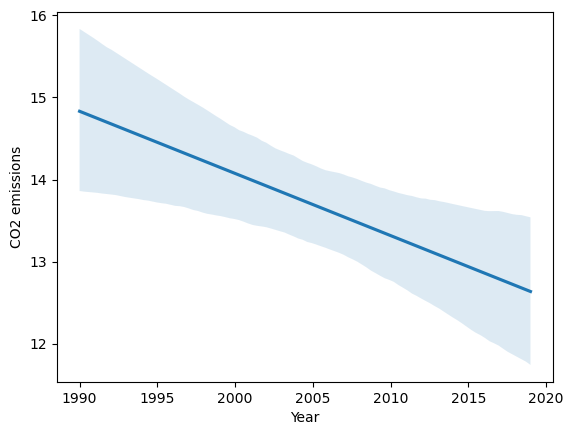

In [ ]:
sns.regplot(x = "Year", 
            y = "CO2 emissions", 
            data = gdpCO2AnalysisDeveloped, scatter = False)
plt.show()


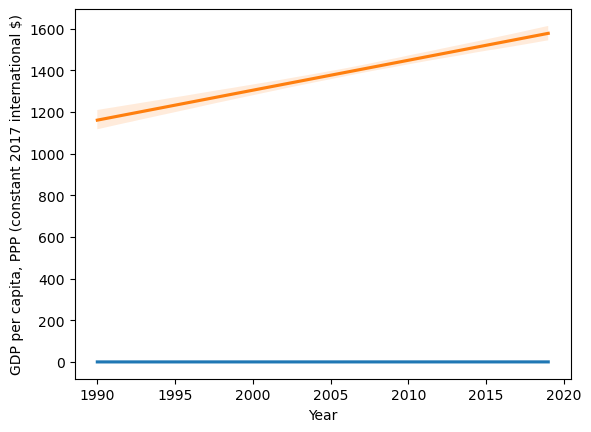

In [ ]:
#Analysis for 15 poorest countries

gdpCO2AnalysisDeveloping = gdpCO2Analysis[gdpCO2Analysis["GDP - PPP Ranking"] == "Bottom 15"]
sns.regplot(x = "Year", 
            y = "CO2 emissions", 
            data = gdpCO2AnalysisDeveloping, scatter = False)

sns.regplot(x = "Year", 
            y = "GDP per capita, PPP (constant 2017 international $)", 
            data = gdpCO2AnalysisDeveloping, scatter = False)
plt.show()


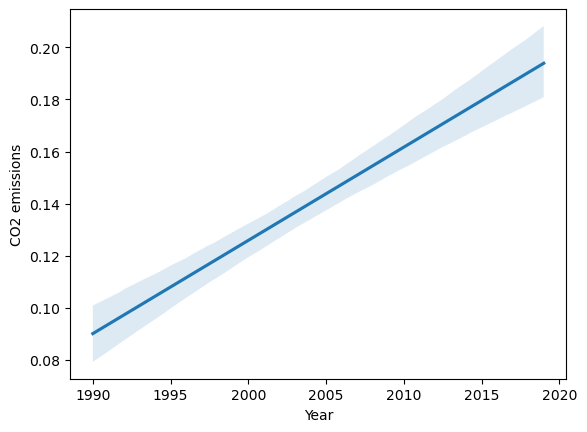

In [ ]:
sns.regplot(x = "Year", 
            y = "CO2 emissions", 
            data = gdpCO2AnalysisDeveloping, scatter = False)
plt.show()

#### Over the years, how does the correlation between GDP and CO2 emissions compare for the  15 richest Countries vs the 15 poorest countries? Do these correlations hold during financial crises periods?

For the richest 15 countries countries, it seems that GDP and CO2 emissions have a very low correlation since they appear to move oppositely. For this group, CO2 have been declining while GDP appears to be steadily growing. 

This is very different for the 15 poorest countries. For this group, GDP and CO2 emissions appear to have a positive/strong correlation, since CO2 emissions and GDP appear to move together. Both have been increasing from 1990. 

It appears these correlations stayed the same during financial crisis periods. During the 2008 and 2020 recessions, the graphs show no change in their directions. 


From the regression graphs we can see that, the 15 richest countries did manage to decrease their CO2 emissions by roughly 2 tons. The 15 poorest countries increased theri CO2 emssions by only 0.11 tons. Despite the 15 richest countries making an effort to decrease their CO2 emissions they still outnumber the CO2 emissions from the 15 poorest countries by a large amount (per capita)

Text(0.5, 1.0, 'CO2 emissions comparison in 1990')

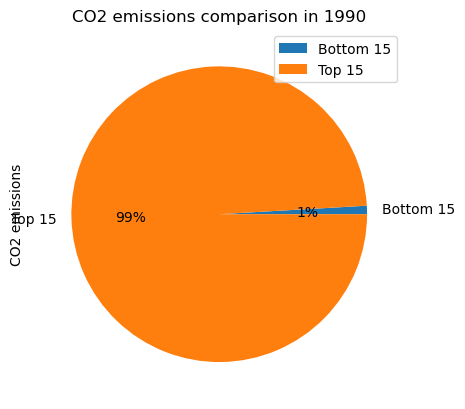

In [ ]:
#Research Question 2
gdpCO2Analysis1990 = gdpCO2Analysis[gdpCO2Analysis["Year"] == 1990]
gdpCO2Analysis1990Plot = gdpCO2Analysis1990.groupby(['GDP - PPP Ranking']).sum().plot(
    kind='pie', y='CO2 emissions', autopct='%1.0f%%')
plt.title("CO2 emissions comparison in 1990")




Text(0.5, 1.0, 'CO2 emissions comparison in 2019')

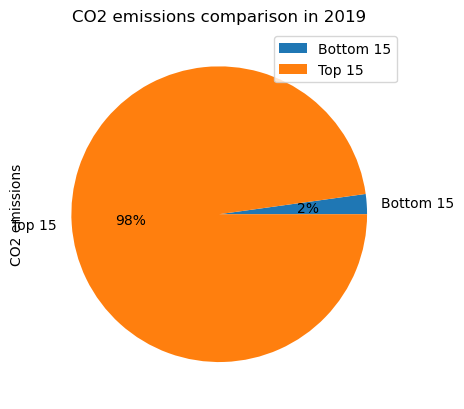

In [ ]:
gdpCO2Analysis2019Plot = gdpCO2Analysis2019 = gdpCO2Analysis[gdpCO2Analysis["Year"] == 2019]
gdpCO2Analysis2019.groupby(['GDP - PPP Ranking']).sum().plot(
    kind='pie', y='CO2 emissions', autopct='%1.0f%%')
plt.title("CO2 emissions comparison in 2019")


#### Question: How does the percantage of CO2 emissions for the top 15 richest Countries (based on GDP - per capita adjusted for purchasing power) compare to the 15 poorest countries? How has this changed over the years?

Both the piecharts show that the top 15 richest countries, emit tremendously more CO2 emissions than the 15 poorest countries. This is not that surprising to me, but I did expect the discrepancy to be a bit smaller. From 1990 to 2019, it doesn't seem this percantage difference changed much. In fact the poorest 15 countries increased their CO2 emissions by only 1% in comparison to the richest 15 countries. 